# Model Evaluation using Yellowbrick

The Yellowbrick library is a diagnostic visualization platform for machine learning that allows data scientists to steer the model selection process. Yellowbrick extends the Scikit-Learn API with a new core object: the Visualizer. Visualizers allow visual models to be fit and transformed as part of the Scikit-Learn Pipeline process, providing visual diagnostics throughout the transformation of high dimensional data.

In [11]:
from yellowbrick.datasets import load_mushroom

X, y = load_mushroom()
print(X[:5]) # inspect the first five rows

    shape surface   color
0  convex  smooth  yellow
1    bell  smooth   white
2  convex   scaly   white
3  convex  smooth    gray
4  convex   scaly  yellow


__Feature Extraction__
Our data, including the target, is categorical. We will need to change these values to numeric ones for machine learning. In order to extract this from the dataset, we’ll have to use scikit-learn transformers to transform our input dataset into something that can be fit to a model. Luckily, scikit-learn does provide transformers for converting categorical labels into numeric integers: sklearn.preprocessing.LabelEncoder and sklearn.preprocessing.OneHotEncoder.

We’ll use a combination of scikit-learn’s Pipeline object (here’s a great post on using pipelines by Zac Stewart), OneHotEncoder, and LabelEncoder:

__Conventional Style in evaluatig models__

In [14]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier


models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    # Test various estimators.
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X, y, model)

SVC: 0.6624286455630514
NuSVC: 0.6726016476215785
LinearSVC: 0.6583804143126177
SGDClassifier: 0.6473492723492724
KNeighborsClassifier: 0.6581185045215279
LogisticRegression: 0.6580434509606933


C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV: 0.6583804143126177
BaggingClassifier: 0.6874746655857316
ExtraTreesClassifier: 0.6871364804544838
RandomForestClassifier: 0.6874746655857316


__Visual Model Evaluation using YellowBrick__

Now let’s refactor our model evaluation function to use Yellowbrick’s ClassificationReport class, a model visualizer that displays the precision, recall, and F1 scores. This visual model analysis tool integrates numerical scores as well as color-coded heatmaps in order to support easy interpretation and detection, particularly the nuances of Type I and Type II error, which are very relevant (lifesaving, even) to our use case!

Type I error (or a “false positive”) is detecting an effect that is not present (e.g. determining a mushroom is poisonous when it is in fact edible).

Type II error (or a “false negative”) is failing to detect an effect that is present (e.g. believing a mushroom is edible when it is in fact poisonous).

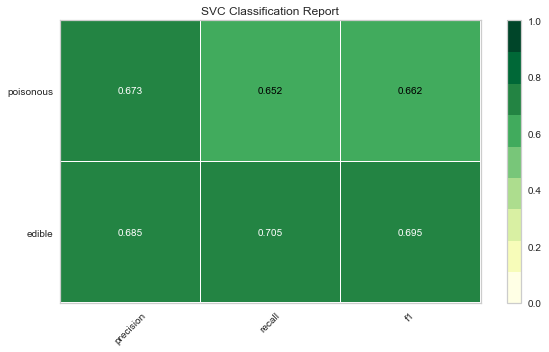

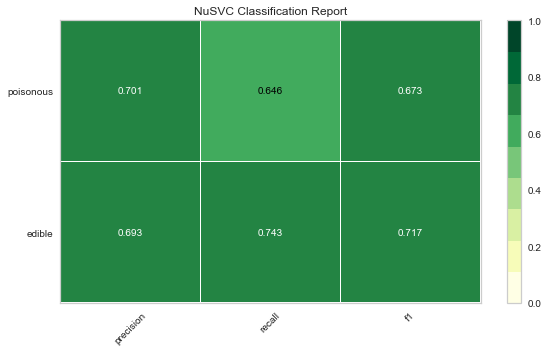

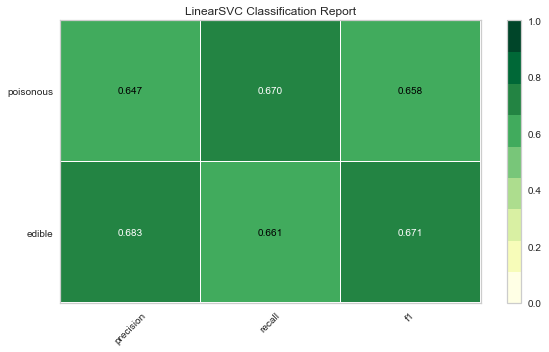

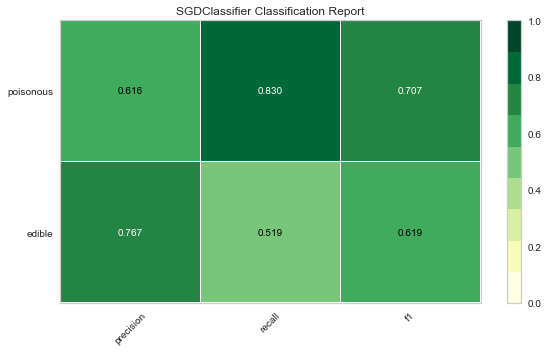

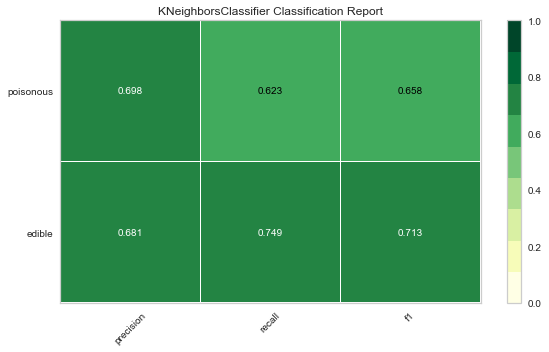

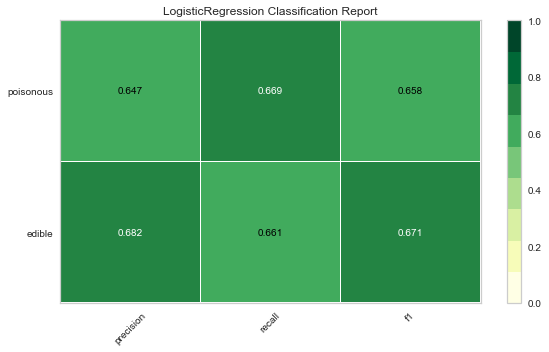

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


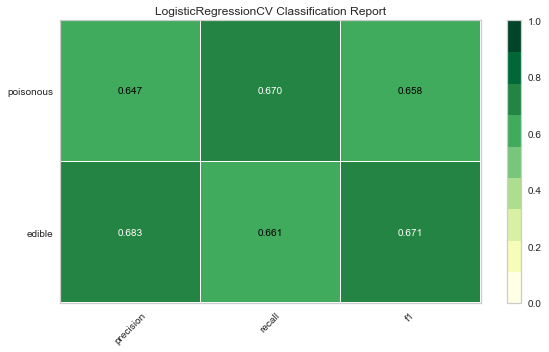

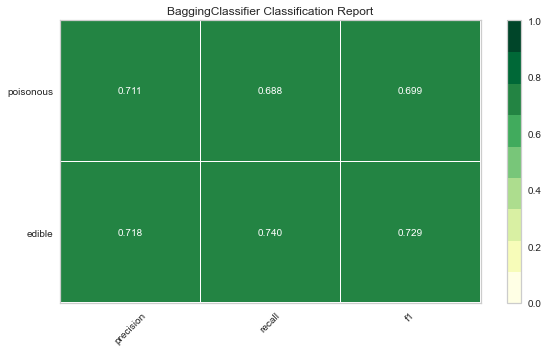

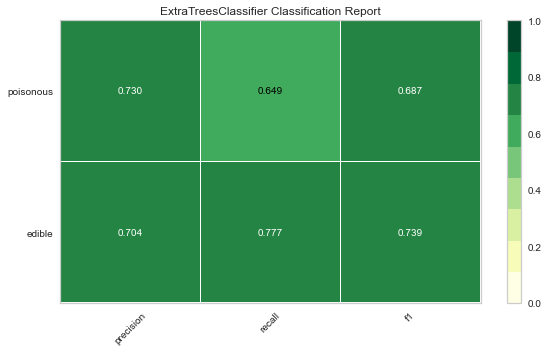

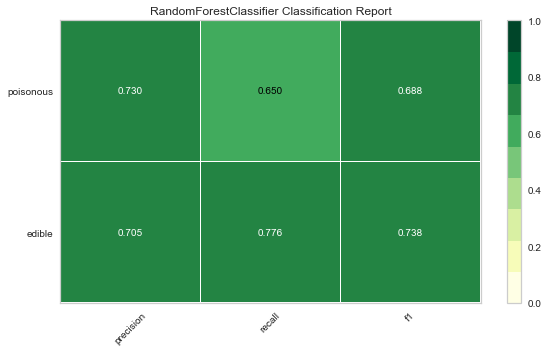

In [15]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    # Test various estimators.
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['edible', 'poisonous'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    visualize_model(X, y, model)